In [ ]:
'''
Train text model using all_data, without importing outside data.
parameter setting as following:

1, (min_count=1, window=2, size=200, sample=1e-4, negative=5, workers=4, iter=30, seed=1)
2, (min_count=1, window=30, size=200, sample=1e-4, negative=5, workers=4, iter=30, seed=1)

Run the baseline test and get the evaluation by metrics: accuracy, NMI, log_loss, confusion_matrix

'''

In [1]:
import os
import re
import tqdm
import string
import pandas as pd
import numpy as np
import util
from sklearn.decomposition import TruncatedSVD
#from data_preprocessing import *
import word_embedding_load as wel
import baseline_classification as bc
import matplotlib.pyplot as plt
import feature_selection_evaluation as fse

In [2]:
[all_data, train_size, test_size, train_x, train_y, test_x] = util.loadData()
sentences = util.data_preprocess(all_data)

In [3]:
param = util.Doc2VecParam(1, 2)
wel.trainTextModel(sentences, param, 'textModel_win=2_no_outside')

Successfully trained the text model!
Save the model to: ../model/doc2vec/


In [4]:
param = util.Doc2VecParam(1, 30)
wel.trainTextModel(sentences, param, 'textModel_win=30_no_outside')

Successfully trained the text model!
Save the model to: ../model/doc2vec/


Successfully loaded the textmodel from ../model/doc2vec/textModel_win=2_no_outside
Results for TextModel: textModel_win=2_no_outside
Accuracy: 0.6097 ± 0.0242
NMI: 0.3876 ± 0.0260
Log_loss: 6.6050 ± 0.4672
Normalized confusion matrix
[[ 0.58761329  0.02567976  0.01208459  0.25226586  0.07099698  0.0347432
   0.01661631  0.          0.        ]
 [ 0.06827309  0.50803213  0.00803213  0.04016064  0.02409639  0.02008032
   0.3313253   0.          0.        ]
 [ 0.09375     0.05208333  0.38541667  0.1875      0.03125     0.          0.25
   0.          0.        ]
 [ 0.19840213  0.02796272  0.01464714  0.71238349  0.0252996   0.00665779
   0.01464714  0.          0.        ]
 [ 0.26217228  0.05992509  0.03745318  0.12734082  0.34082397  0.04494382
   0.12734082  0.          0.        ]
 [ 0.16161616  0.09090909  0.01010101  0.05387205  0.03703704  0.58922559
   0.05723906  0.          0.        ]
 [ 0.04933586  0.17267552  0.028463    0.0313093   0.0142315   0.00474383
   0.69449715  0.    

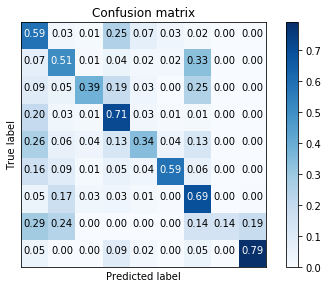

Successfully loaded the textmodel from ../model/doc2vec/textModel_win=30_no_outside
Results for TextModel: textModel_win=30_no_outside
Accuracy: 0.5509 ± 0.0211
NMI: 0.3023 ± 0.0213
Log_loss: 8.2882 ± 0.7595
Normalized confusion matrix
[[ 0.55438066  0.03172205  0.02114804  0.22205438  0.09063444  0.05891239
   0.01963746  0.          0.00151057]
 [ 0.10240964  0.4437751   0.01405622  0.08835341  0.02409639  0.04016064
   0.28313253  0.          0.00401606]
 [ 0.13541667  0.03125     0.35416667  0.1875      0.03125     0.
   0.26041667  0.          0.        ]
 [ 0.18908123  0.02929427  0.01464714  0.66977364  0.03462051  0.02929427
   0.02663116  0.          0.00665779]
 [ 0.29588015  0.04868914  0.04494382  0.13108614  0.31086142  0.05617978
   0.11235955  0.          0.        ]
 [ 0.16835017  0.05050505  0.01010101  0.06397306  0.05387205  0.5993266
   0.05050505  0.          0.003367  ]
 [ 0.10151803  0.15749526  0.0370019   0.06451613  0.02941176  0.01897533
   0.58633776  0.    

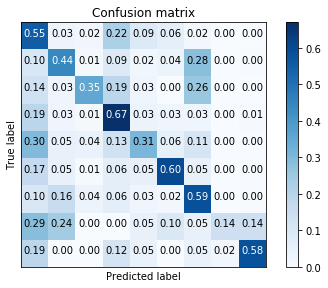

In [7]:
fse.runTextModelEval(['textModel_win=2_no_outside', 'textModel_win=30_no_outside'])